## Name : Aditya Singh
## Reg. No. : 220968396
## Sec. : A
## Batch: 2

# Week 4
## Decision Tree and Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import *
import graphviz
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("../data/week5/DecTree_dataset.csv")
df = df.set_index('Day')
df

,Outlook,Temp,Humidity,Wind,Play Tennis
Day,,,,,
D1,Sunny,Hot,High,Weak,No
D2,Sunny,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Yes
D4,Rain,Mild,High,Weak,Yes
D5,Rain,Cool,Normal,Weak,Yes
D6,Rain,Cool,Normal,Strong,No
D7,Overcast,Cool,Normal,Strong,Yes
D8,Sunny,Mild,High,Weak,No
D9,Sunny,Cool,Normal,Weak,Yes


In [3]:
df = df.apply(LabelEncoder().fit_transform)
df

,Outlook,Temp,Humidity,Wind,Play Tennis
Day,,,,,
D1,2,1,0,1,0
D2,2,1,0,0,0
D3,0,1,0,1,1
D4,1,2,0,1,1
D5,1,0,1,1,1
D6,1,0,1,0,0
D7,0,0,1,0,1
D8,2,2,0,1,0
D9,2,0,1,1,1


In [4]:
x = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']
print(x)
print(y)

     Outlook  Temp  Humidity  Wind
Day                               
D1         2     1         0     1
D2         2     1         0     0
D3         0     1         0     1
D4         1     2         0     1
D5         1     0         1     1
D6         1     0         1     0
D7         0     0         1     0
D8         2     2         0     1
D9         2     0         1     1
D10        1     2         1     1
D11        2     2         1     0
D12        0     2         0     0
D13        0     1         1     1
D14        1     2         0     0
Day
D1     0
D2     0
D3     1
D4     1
D5     1
D6     0
D7     1
D8     0
D9     1
D10    1
D11    1
D12    1
D13    1
D14    0
Name: Play Tennis, dtype: int64


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

In [7]:
yDT_pred = dtree.predict(x_test)
yDT_pred

array([1, 0, 0, 1, 1])

In [8]:
print(accuracy_score(yDT_pred, y_test))

0.6


[Text(0.6666666666666666, 0.875, 'Humidity <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.5, 0.625, 'Outlook <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.375, 'Wind <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

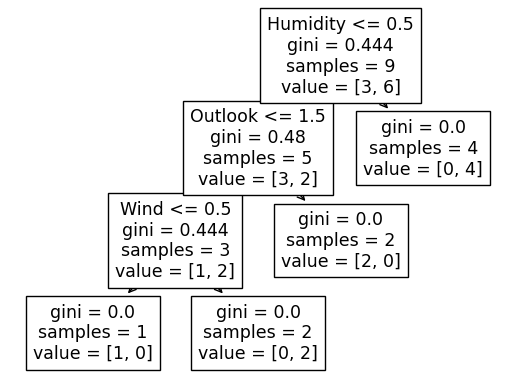

In [9]:
tree.plot_tree(dtree, feature_names=['Outlook', 'Temp', 'Humidity', 'Wind'])

In [10]:
f = open('dt.txt', 'w')
f2 = export_graphviz(dtree, out_file=f)

In [11]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [12]:
yRF_pred = rf.predict(x_test)
yRF_pred

array([1, 0, 0, 1, 1])

In [13]:
print(accuracy_score(yRF_pred, y_test))

0.6


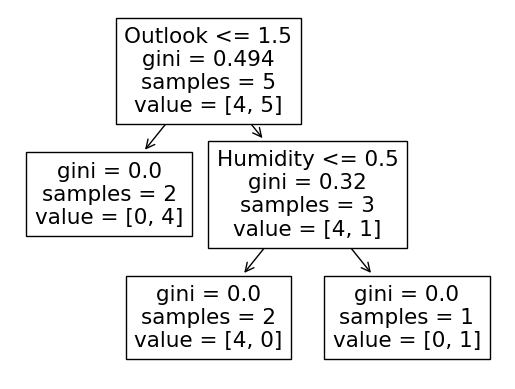

In [14]:
for i in rf.estimators_:
    tree.plot_tree(i, feature_names=['Outlook', 'Temp', 'Humidity', 'Wind'])

In [15]:
df1 = pd.read_csv("../data/week5/DecTree_dataset2.csv")
df1 = df1.set_index('CGPA')
df1

,Interactive,Practical Knowledge,Skills,Job Offer
CGPA,,,,
>=9,Yes,Very good,Good,Yes
>=8,No,Good,Moderate,Yes
>=9,No,Average,Poor,No
<8,No,Average,Good,No
>=8,Yes,Good,Moderate,Yes
>=9,Yes,Good,Moderate,Yes
<8,Yes,Good,Poor,No
>=9,No,Very good,Good,Yes
>=8,Yes,Good,Good,Yes


In [16]:
df1 = df1.apply(LabelEncoder().fit_transform)
df1

,Interactive,Practical Knowledge,Skills,Job Offer
CGPA,,,,
>=9,1,2,0,1
>=8,0,1,1,1
>=9,0,0,2,0
<8,0,0,0,0
>=8,1,1,1,1
>=9,1,1,1,1
<8,1,1,2,0
>=9,0,2,0,1
>=8,1,1,0,1


In [17]:
x1 = df1.drop('Job Offer', axis=1)
y1 = df1['Job Offer']
print(x1)
print(y1)

      Interactive   Practical Knowledge  Skills
CGPA                                           
>=9              1                    2       0
>=8              0                    1       1
>=9              0                    0       2
<8               0                    0       0
>=8              1                    1       1
>=9              1                    1       1
<8               1                    1       2
>=9              0                    2       0
>=8              1                    1       0
>=8              1                    0       0
CGPA
>=9    1
>=8    1
>=9    0
<8     0
>=8    1
>=9    1
<8     0
>=9    1
>=8    1
>=8    1
Name: Job Offer, dtype: int64


In [18]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [19]:
dtree1 = DecisionTreeClassifier()
dtree1 = dtree.fit(x1_train, y1_train)

In [20]:
yDT1_pred = dtree.predict(x1_test)
yDT1_pred

array([1, 1, 1])

In [21]:
print(accuracy_score(yDT1_pred, y1_test))

1.0


[Text(0.6666666666666666, 0.875, 'Skills <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.5, 0.625, 'Practical Knowledge <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3333333333333333, 0.375, 'Interactive <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

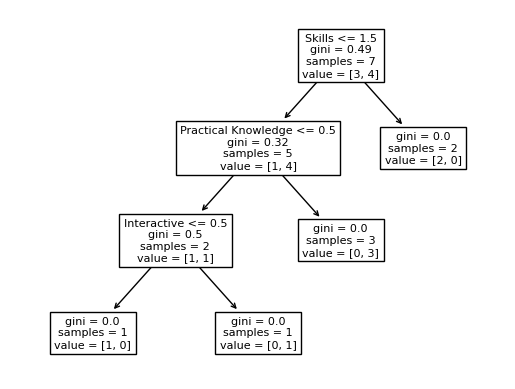

In [22]:
tree.plot_tree(dtree1, feature_names=['Interactive', 'Practical Knowledge', 'Skills'])

In [23]:
f1 = open('dt2.txt', 'w')
f3 = export_graphviz(dtree1, out_file=f1)

In [24]:
rf1 = RandomForestClassifier()
rf1.fit(x1_train, y1_train)

RandomForestClassifier()

In [25]:
yRF1_pred = rf1.predict(x1_test)
yRF1_pred

array([1, 0, 1])

In [26]:
print(accuracy_score(yRF1_pred, y1_test))

0.6666666666666666


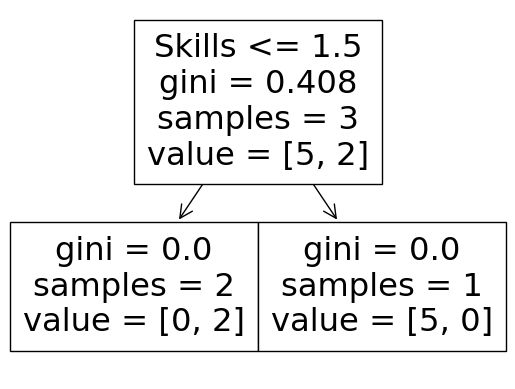

In [27]:
for i in rf1.estimators_:
    tree.plot_tree(i, feature_names=['Interactive', 'Practical Knowledge', 'Skills'])